<a href="https://colab.research.google.com/github/anahigomez/CadenaSuministro-AI/blob/master/d_ControlProcesos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
!pip install pyspc 
from pyspc import *
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

  Created wheel for pyspc: filename=pyspc-0.4-cp36-none-any.whl size=30878 sha256=3458454d0f7e5d5fb66da847884cd9a5f69f192238965c69b8d4baa111a581ff
  Stored in directory: /root/.cache/pip/wheels/bf/03/f8/b15370eb2f37f1fbc6b921ce1460d94f81f6cb648926086991
Successfully built pyspc


In [0]:
# Producción de dulces en los Estados Unidos por fecha gestion y mes 
#data = pd.read_csv("../Datos/candy_productions.csv")
data = pd.read_csv("candy_productions.csv")


In [3]:
data.shape

(332, 6)

In [4]:
data.head(5)

,date,year,month,production1,production2,production3
0,1990-01-01,1990,1,99.9894,75.7999,142.7999
1,1990-02-01,1990,2,101.2116,73.7547,117.7547
2,1990-03-01,1990,3,94.8477,93.1582,108.1582
3,1990-04-01,1990,4,88.4239,102.2382,155.2382
4,1990-05-01,1990,5,88.6775,69.2708,155.2708


In [5]:
data.index.dtype

dtype('int64')

In [6]:
data1 = data.groupby('year').agg({'production1' : lambda x: x.sum(),
                                  'production2' : lambda x: x.sum(),
                                  'production3' : lambda x: x.sum()})
#data.columns =['production1','production2']
data1.head()

,production1,production2,production3
year,,,
1990,1265.9570,1283.7596,1591.7596
1991,1316.8270,1499.4401,1309.4401
1992,1231.8878,1267.2503,1399.2503
1993,1255.2003,1364.3083,1360.3083
1994,1255.1259,1425.5262,1431.5262


In [7]:
data.to_records().dtype
data.index = data.index.astype('i8')
cols = ['production1','production2','production3'] # Columnas que queremos cargar
data1[cols].head()

,production1,production2,production3
year,,,
1990,1265.9570,1283.7596,1591.7596
1991,1316.8270,1499.4401,1309.4401
1992,1231.8878,1267.2503,1399.2503
1993,1255.2003,1364.3083,1360.3083
1994,1255.1259,1425.5262,1431.5262


In [8]:
#Datos desde 01-1990 hasta 08-2017
data2 = data1[cols].values
data2

array([[1265.957 , 1283.7596, 1591.7596],
       [1316.827 , 1499.4401, 1309.4401],
       [1231.8878, 1267.2503, 1399.2503],
       [1255.2003, 1364.3083, 1360.3083],
       [1255.1259, 1425.5262, 1431.5262],
       [1270.1582, 1327.294 , 1435.294 ],
       [1322.318 , 1258.5922, 1328.5922],
       [1347.9634, 1289.318 , 1313.318 ],
       [1425.1335, 1404.9037, 1432.9037],
       [1396.5543, 1383.479 , 1345.479 ],
       [1462.279 , 1378.3539, 1286.3539],
       [1446.6292, 1293.7826, 1326.7826],
       [1385.3818, 1313.5118, 1303.5118],
       [1379.4629, 1283.2887, 1281.2887],
       [1394.5927, 1354.3612, 1247.3612],
       [1439.4358, 1205.456 , 1451.456 ],
       [1380.4629, 1368.0427, 1410.0427],
       [1300.7343, 1379.8707, 1295.8707],
       [1186.188 , 1173.3889, 1374.3889],
       [1133.7732, 1306.6877, 1272.6877],
       [1242.1636, 1293.4226, 1346.4226],
       [1207.1503, 1275.8711, 1256.8711],
       [1199.9999, 1390.9851, 1342.9851],
       [1251.1338, 1331.8517, 1426

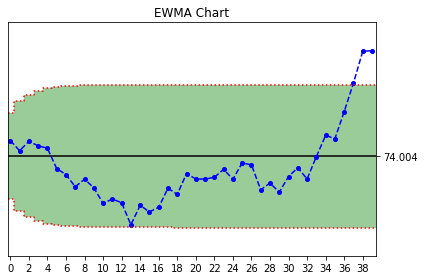

<pyspc: (-9223363283110261851)>


In [9]:
a = spc(pistonrings) + ewma()
print(a)

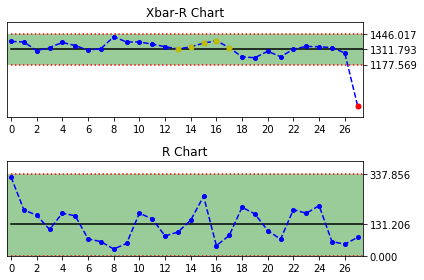

<pyspc: (-9223363283110261956)>


In [10]:
#data= data.values
a = spc(data2) + xbar_rbar() +rbar() + rules()
print(a)

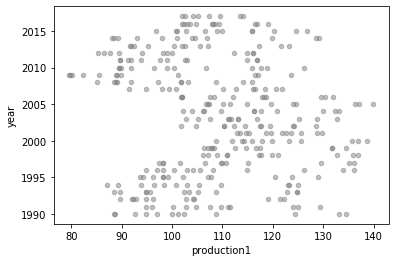

In [11]:
# Diagrama de dispersión produccion por año
var = 'production1'
data = pd.concat([data['year'], data[var]], axis=1)
data.plot.scatter(x=var, y='year', alpha = 0.5);

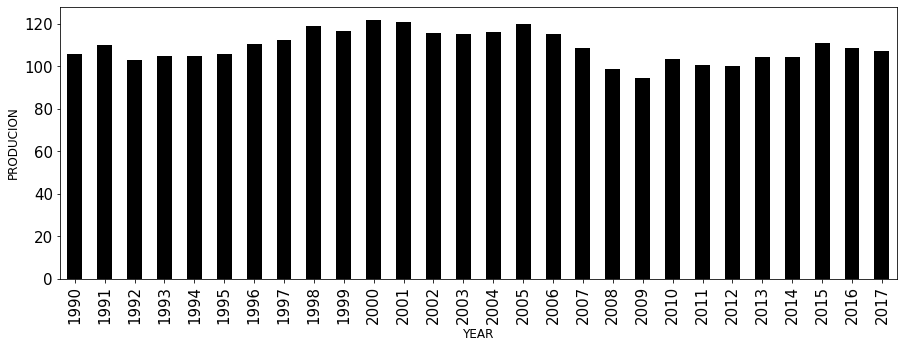

In [12]:
d=data.groupby('year').mean()["production1"].plot(kind='bar', figsize=(15, 5), fontsize=15)
d.set_xlabel("YEAR", fontsize=12)
d.set_ylabel("PRODUCION", fontsize=12)
plt.show()